In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

### 1. Collecting the data

In [208]:
titanic_data = pd.read_csv('titanic.csv')

In [209]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
print('# of passengers in original data:' +str(len(titanic_data)))

# of passengers in original data:891


### 2. Analyzing Data

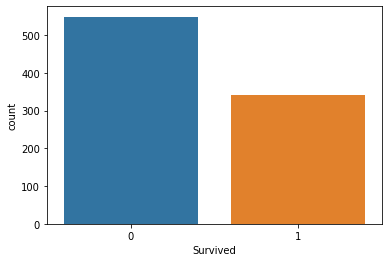

In [211]:
sns.countplot(x = 'Survived', data=titanic_data)

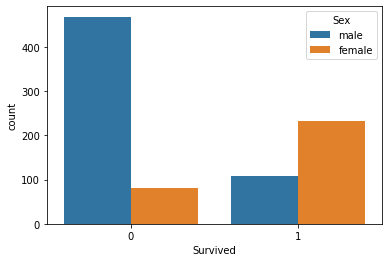

In [212]:
sns.countplot(x='Survived', hue = 'Sex', data=titanic_data)

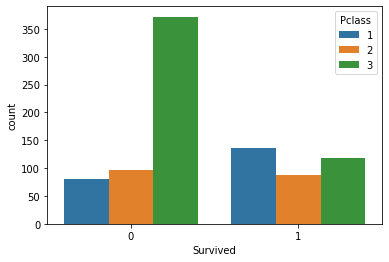

In [213]:
sns.countplot(x ='Survived', hue='Pclass', data=titanic_data)

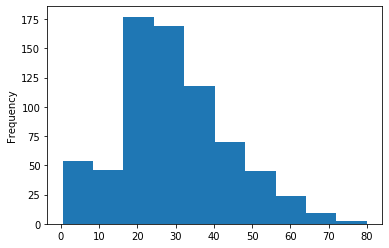

In [214]:
titanic_data['Age'].plot.hist()

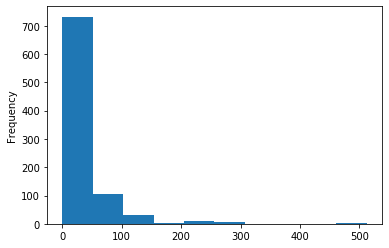

In [215]:
titanic_data['Fare'].plot.hist()

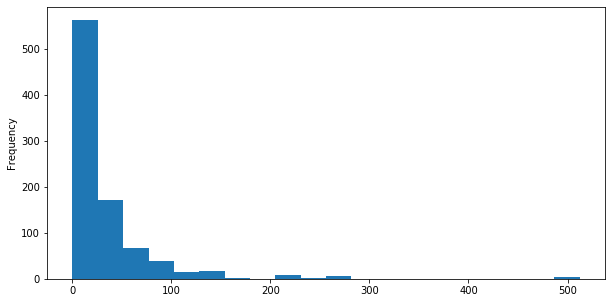

In [216]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

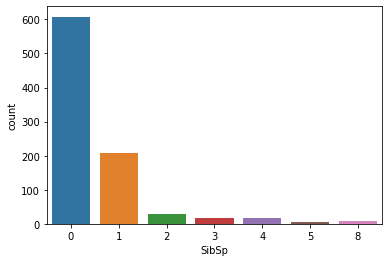

In [217]:
sns.countplot(x='SibSp', data=titanic_data)

In [218]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 3. Data wrangling

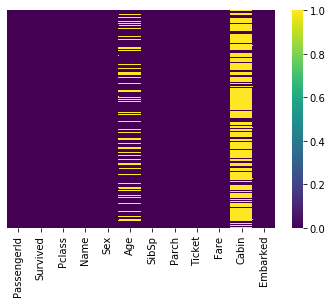

In [219]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

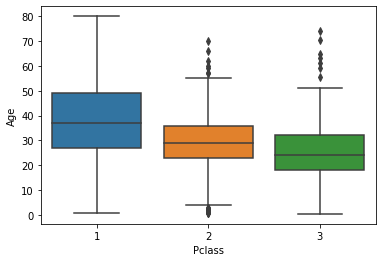

In [220]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [221]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
titanic_data.drop('Cabin', axis=1, inplace=True)

In [223]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [224]:
titanic_data.dropna(inplace=True)

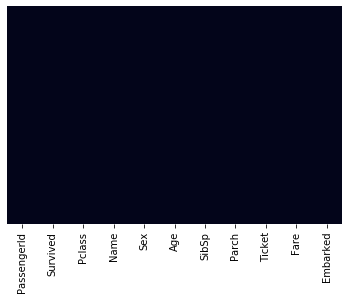

In [225]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [226]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [227]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [228]:
embark = pd.get_dummies(titanic_data['Embarked'])
embark.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [229]:
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [230]:
pcl = pd.get_dummies(titanic_data['Pclass'])
pcl.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [231]:
pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [232]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [233]:
titanic_data.drop(['Sex','Pclass', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [234]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


## Train Data

In [235]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Baaseline model

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [238]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.65      0.92      0.76       126
           1       0.72      0.30      0.42        88

    accuracy                           0.66       214
   macro avg       0.69      0.61      0.59       214
weighted avg       0.68      0.66      0.62       214



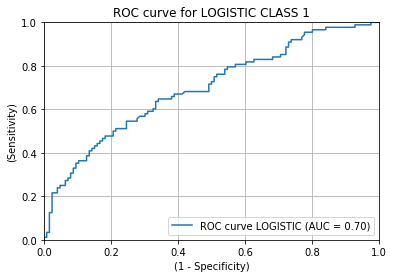

In [239]:
from sklearn.metrics import roc_curve, auc
logmodel_pred_prob = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logmodel_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LOGISTIC (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LOGISTIC CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [240]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
model_predictions = LDA_model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6588785046728972
              precision    recall  f1-score   support

           0       0.64      0.95      0.77       126
           1       0.78      0.24      0.37        88

    accuracy                           0.66       214
   macro avg       0.71      0.60      0.57       214
weighted avg       0.70      0.66      0.60       214



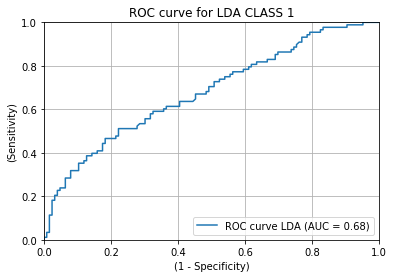

In [241]:
from sklearn.metrics import roc_curve, auc
LDA_model_pred_prob = LDA_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, LDA_model_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [242]:
from sklearn.ensemble import RandomForestClassifier
RF_model  = RandomForestClassifier()
RF_model.fit(X_train, y_train)
RF_model_predictions = RF_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,RF_model_predictions))
print(classification_report(y_test, RF_model_predictions))

Accuracy:  0.6542056074766355
              precision    recall  f1-score   support

           0       0.70      0.73      0.71       126
           1       0.59      0.55      0.56        88

    accuracy                           0.65       214
   macro avg       0.64      0.64      0.64       214
weighted avg       0.65      0.65      0.65       214



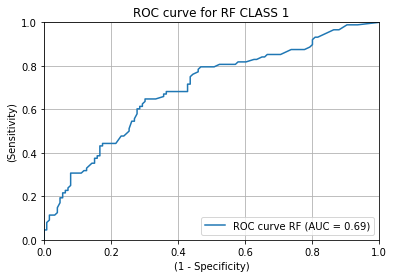

In [243]:
from sklearn.metrics import roc_curve, auc
RF_model_pred_prob = RF_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, RF_model_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve RF (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for RF CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [244]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6214953271028038
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       126
           1       0.55      0.48      0.51        88

    accuracy                           0.62       214
   macro avg       0.60      0.60      0.60       214
weighted avg       0.62      0.62      0.62       214



In [245]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       126
           1       0.60      0.53      0.57        88

    accuracy                           0.66       214
   macro avg       0.65      0.64      0.65       214
weighted avg       0.66      0.66      0.66       214



In [246]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_model_predictions = NB_model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, NB_model_predictions)))
print("="*80)
print(classification_report(y_test, NB_model_predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.64      0.97      0.77       126
           1       0.83      0.23      0.36        88

    accuracy                           0.66       214
   macro avg       0.74      0.60      0.56       214
weighted avg       0.72      0.66      0.60       214



In [247]:
model = SVC()
model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       126
           1       0.71      0.31      0.43        88

    accuracy                           0.66       214
   macro avg       0.68      0.61      0.60       214
weighted avg       0.68      0.66      0.62       214



### Oversampling with SMOTE

In [248]:
from imblearn.over_sampling import SMOTE

In [249]:
oversampler = SMOTE(random_state = 0)
smote_train, smote_target = oversampler.fit_sample(X_train, y_train)

In [250]:
smote_train.shape

(596, 4)

In [251]:
X_train.shape

(498, 4)

In [252]:
# Logistic Regression
logmodel.fit(smote_train, smote_target)
predictions = logmodel.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy score: 0.677570093457944
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       126
           1       0.65      0.47      0.54        88

    accuracy                           0.68       214
   macro avg       0.67      0.65      0.65       214
weighted avg       0.67      0.68      0.67       214



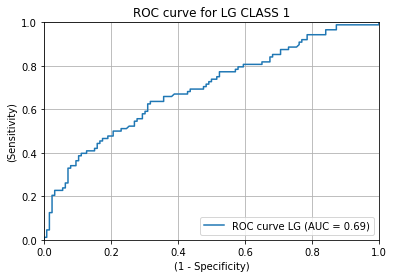

In [253]:
from sklearn.metrics import roc_curve, auc
LG_pred_prob = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, LG_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LG (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LG CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [254]:
# GaussianNB
NB_model.fit(smote_train, smote_target)
NB_model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, NB_model_predictions)))
print("="*80)
print(classification_report(y_test, NB_model_predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       126
           1       0.71      0.31      0.43        88

    accuracy                           0.66       214
   macro avg       0.68      0.61      0.60       214
weighted avg       0.68      0.66      0.62       214



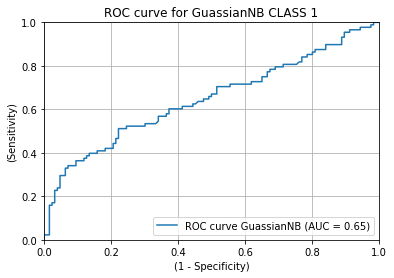

In [255]:
from sklearn.metrics import roc_curve, auc
NB_pred_prob = NB_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, NB_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve GuassianNB (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for GuassianNB CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [256]:
# Decision Tree
DT_model = DecisionTreeClassifier()
DT_model.fit(smote_train, smote_target)
DT_model_predictions = DT_model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, DT_model_predictions)))
print("="*80)
print(classification_report(y_test, DT_model_predictions))

Accuracy score: 0.6682242990654206
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       126
           1       0.60      0.58      0.59        88

    accuracy                           0.67       214
   macro avg       0.66      0.65      0.66       214
weighted avg       0.67      0.67      0.67       214



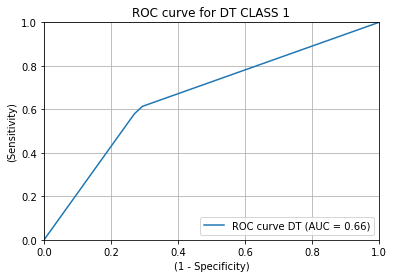

In [257]:
from sklearn.metrics import roc_curve, auc
DT_pred_prob = DT_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, DT_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve DT (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for DT CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [258]:
# K-Neighbors
KN_model = KNeighborsClassifier()
KN_model.fit(X_train, y_train)
model_predictions = model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, model_predictions)))
print("="*80)
print(classification_report(y_test, model_predictions))

Accuracy score: 0.6635514018691588
              precision    recall  f1-score   support

           0       0.65      0.91      0.76       126
           1       0.71      0.31      0.43        88

    accuracy                           0.66       214
   macro avg       0.68      0.61      0.60       214
weighted avg       0.68      0.66      0.62       214



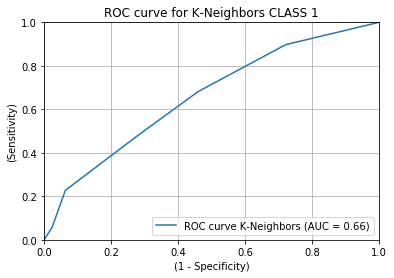

In [259]:
from sklearn.metrics import roc_curve, auc
KN_pred_prob =KN_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, KN_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve K-Neighbors (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for K-Neighbors CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [260]:
SVC_model = SVC()
SVC_model.fit(smote_train, smote_target)
SVC_model_predictions = SVC_model.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, SVC_model_predictions)))
print("="*80)
print(classification_report(y_test, SVC_model_predictions))

Accuracy score: 0.6728971962616822
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       126
           1       0.63      0.50      0.56        88

    accuracy                           0.67       214
   macro avg       0.66      0.65      0.65       214
weighted avg       0.67      0.67      0.67       214

